# Содержание 

1  **Обзор данных**

2  **Предобработка данных**

3  **Исследовательский анализ данных**

3.1  Количество игр за каждый год

3.2  Изменение продаж по всем платформам

3.3  Построение прогноза на 2017 год

3.4  «Ящик с усами» и глобальные продажи игр в разбивке по платформам

3.5  Влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы .

3.5.1  Зависимость пользовательских отзвывов на продажи по платформе PS4

3.5.2  Зависимость продаж от рейтинга критиков по платформе PS4

3.6  Зависимость отзывов пользователей и критиков и продаж всех платформ

3.7  Анализ игр в зависимости от их жанра

4  **Портрет пользователя каждого региона: Северная Америка, Европейский союз, Япония**

4.1  Самые популярные платформы

4.1.1  Портрет пользователя в Северной Америке

4.1.2  Портрет пользователя в Европейском Союзе

4.2  Самые популярные жанры (top-5)

4.2.1  Портрет пользователя в Северной Америке

4.2.2  Портрет пользователя в Северной Америке

4.2.3  Портрет пользователя в Северной Америке

4.3  Влияние рейтинга ESRB на продажи в отдельном регионе

5  **Анализ гипотез**

5.1  Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

5.2  Средние пользовательские рейтинги жанров Action и Sports разные

6  **Вывод**

# Исследование о влиянии различных факторов на процесс продажи компьютерных игр

# Исходные данные

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Данные представлены до 2016 года. Представим, что сейчас декабрь 2016 г., и планируется кампания на 2017-й. Нужно отработать принцип работы с данными. Неважно, осуществляет ли прогноз продаж на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Описание данных:

 **Name** — название игры
 
 **Platform** — платформа
 
 **Year_of_Release** — год выпуска
 
 **Genre** — жанр игры
 
 **NA_sales** — продажи в Северной Америке (миллионы проданных копий)
 
 **EU_sales** — продажи в Европе (миллионы проданных копий)
 
 **JP_sales** — продажи в Японии (миллионы проданных копий)
 
 **Other_sales** — продажи в других странах (миллионы проданных копий)
 
 **Critic_Score** — оценка критиков (максимум 100)
 
 **User_Score** — оценка пользователей (максимум 10)
 
 **Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

В предостоящем проекте рассмотрим основные закономерности, сопровождающие продажу копьютерных игр и влияющие на ее дальнейшее продвижение.

Цель - выявить факторы, которые могут повлиять на продажу компьютерных игр в перспективе.

Анализ данных пройдёт в 4 этапа:

- Обзор данных;
- Предобработка данных;
- Проведение исследовательского анализа данных;
- Анализ потрета потребителей для различных регионов;
- Проверка гипотез.

### Обзор данных

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats as st
import numpy as np
import warnings

In [2]:
warnings.filterwarnings('ignore') 

In [3]:
data = pd.read_csv('/datasets/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Рассмотрев датасет, мы видим по первым 10-ти строкам, что данные требуется предообработать для корректного анализа: изменить типы данных, привести столбцы к нижнему регистру, найти дубликаты и обработать пропуски.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
data.duplicated().sum()

0

Таким образом:
- Исходные данные содержат 16 715 строк и 12 стобцов. 
- Несоответствующие типы данных выявлены у следующих столбцов: Year_of_Release, User_Score. 
- Пропущенные значения находятся в 5 стобцах, которые необходимо будет обработать в следующем разделе: name, year_of_release, critic_score, user_score, rating. 
- Дубликаты в данных отсутствуют.

### Предобработка данных

#### Замена регистра у столбцов

Произведем замену названий столбцов на нижний регистр.

In [7]:
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Преобразование данных на нужный тип.
Изменить тип данных необходимо в столбцах: 
- year_of_release: так как год выпуска игры является датой и должно быть выражено целым числом, а не вещественным;
- user_score: оценка пользователей должна отражаться в числовом выражении.

In [8]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

In [9]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Среди данных столбца user_score найдены значения "tbd". tbd - "to be determined" в пер. с англ. означает  "будет определено". То есть, данные показатели еще не сформировались. Эти данные мы не можем заменить на средние значения, так как конкретно не знаем, какая оценка пользователей может оказаться - слишком непредсказуемая величина. В связи с этим, их необходимо заменить на уже существующие "nan", а уже потом изменить тип данных.

In [10]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)

In [11]:
data['user_score'] = data['user_score'].astype('float')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


#### Обработка пропусков

Раннее мы рассмотрели датасет на наличие пропусков и нашли их в следующих столбцах: name, year_of_release, critic_score, user_score, rating.

Столбец 'name'

Необходимо удалить пропущенные строки из столбца name, так как удаление двух строк из такого большого датасета не повлечет за собой искажение анализа, а внести предположительные названия игр мы не можем.

In [13]:
data= data.dropna(subset = ['name'])

Столбцы: 'year_of_release', 'user_score', critic_score, 'rating' необходимо оставить без заполнения пропусков, так как мы не сможем заполнить их корректно из-за отсутствия точной информации, а если удалить такое количество пропусков, то возникает вероятность исказить последющий анализ в целом, и по отдельным столбцам в частности.


На мой взгляд, такое количество пропусков в столбце 'user_score' вызвано тем, что существуют игры, выпущенные до того, как начали проставляться различные рейтинги и оценки. При этом, зачастую даже постоянно играющие пользователи не доходят до выставления оценок продукта, а лишь играют. Скорее, оценка пользователя разносится с помощью словенных отзывов среди своего окружения, нежели пользователь заполненяет различные формы  с описаниеми и отражением своего мнения на просторах интернета. 

Также, необходимо отметить, что большое количетсво пропусков содержится в столбце 'rating'. Рейтинг, отображющийся в данном столбце формируется ESRB, присуждающая рейтинги играм была основана в 90х годах. Я считаю, что пропуски в данном столбце обусловлены тем, что существуют игры, выпущенные раннее образования данной организации, то есть по данному столбцу имеют незаполненные значения.

#### Суммарные продажи во всех регионах

In [14]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Таким образом:
- Изменили тип данных некоторых столбцов, чтобы в дальнейшем не сталкиваться с ошибками при анализе.
- С помощью замены некорректных значений, например, tbd, мы заполнили данные в столбце user_score. 
- Удалили пропущенные значения там, где возможно было это сделать корректно без угрозы для дальнейшего исследования. Пропуски в столбцах year_of_release , critic_score , user_score , rating оставим без обработки в связи с тем, что их заполнение может "сдвинуть" статистику, а анализ в дальнейшем окажется некорректным.


### Исследовательский анализ данных

#### Количество игр за каждый год

In [15]:
games_per_year = (
    data
    .groupby('year_of_release')['name']
    .count()
    .reset_index()
    .sort_values(by='name', ascending=False)
)
games_per_year.head(10)

,year_of_release,name
28,2008,1427
29,2009,1426
30,2010,1255
27,2007,1197
31,2011,1136
26,2006,1006
25,2005,939
22,2002,829
23,2003,775
24,2004,762


C 1980 по 2008 год количество выпущенных игр в год постепенно росло. Пиковой точкой выпуска игр являкется 2008 год, в котором было выпущено 1 427 штук.

Рассмотрим, как данные выглядит на графике.

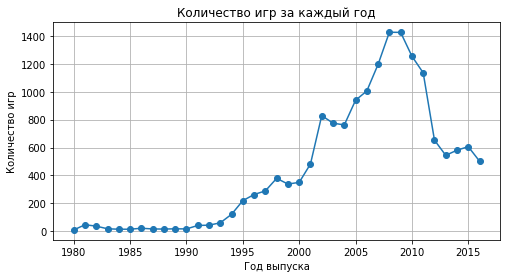

In [16]:
(
    data.pivot_table(index='year_of_release', values='name', aggfunc='count')
    .plot(style='o-', title='Количество игр за каждый год', figsize=(8, 4), legend=False, grid=True)
)
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.show()

Мы видим, что с 2008 по 2011 объем выпущенных игр за год еще держится примерно на одном уровне, но уже постепенно начинает снижаться. После 2011 года происходит резкое снижение выпуска игр в каждом последующем году.

Снижение выпуска может быть обусловлено тем, в совокупности с мировым кризисом 2008 года в данный период началось развитие мобильных и онлайн-игр. В связи с тем, что данные продукты влекут за собой пониженные риски и быстрее выходят на точку прибыли, они стали более перспективными для продажи. Также, для создания игр для мобильных устройств не требуется содержать большую команду, а сам цикл разработки гораздо быстрее. Вероятно, данные факторы сильно повлияли на развитие индустрии компьютерных игр. 

#### Изменение продаж по всем платформам

Рассмотрим совокупность продаж по каждой из платформ и передадим это в переменную sales_by_platform

In [17]:
sales_by_platform = (
    data
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
)
    
sales_by_platform.head(10)

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


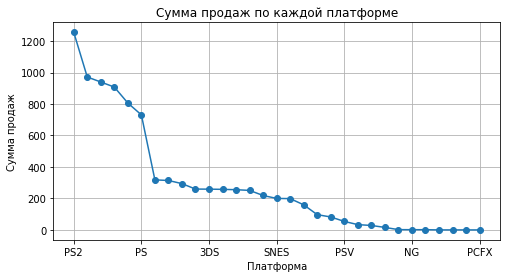

In [18]:
(
    data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .plot(style='o-', title='Сумма продаж по каждой платформе', figsize=(8, 4), grid=True, legend=False)
)
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж')
plt.show()

Мы видим, что основным платформами на основании сумм продаж являются первые 6 позиций, остальные платформы значительно отстают по своей востребованности. Самой популярной платформой является "PS2", крайней точкой перед резким снижением суммы продаж является платформа "PS"

Рассмотрим изменение продаж и построим распределение по годам по саммым востребованным платформам:
- создадим список самых популярных платформ;
- построим график, сгруппировав суммы продаж за каждый год по сформированной выборке.

In [19]:
popular_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

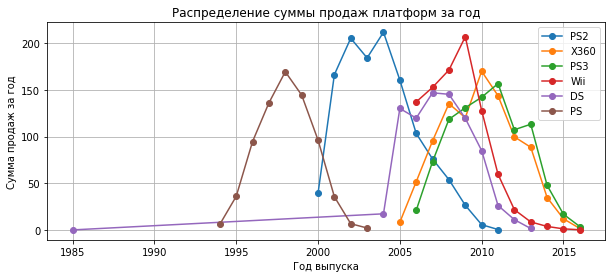

In [20]:
for name in range(len(popular_platforms)):
    data.query('platform == @popular_platforms[@name]').groupby('year_of_release')['total_sales'].sum().plot(
        style='o-', title='Распределение суммы продаж платформ за год', 
        figsize=(10, 4), label=popular_platforms[name], grid=True)
plt.xlabel('Год выпуска')    
plt.ylabel('Сумма продаж за год')
plt.legend()
plt.show();

По графику мы можем заметить, что в среднем срок "жизненного цикла"  платформы составляет 10 лет. 
Пика продаж за сформированый период достигла платформа явлется "PS2", 2ю позицию занимает платформа "Wii".
50% платформ были выпущены после 2005 года и в дальнейшем занимали среднюю позицию продаж относительно рынка: "X360","PS3", "Wii".




#### Построение прогноза на 2017 год

Рассмотрим графики актуальности платформ, выпущенных за последние 5 лет, чтобы найти актуальный период для прогноза на 2017 год

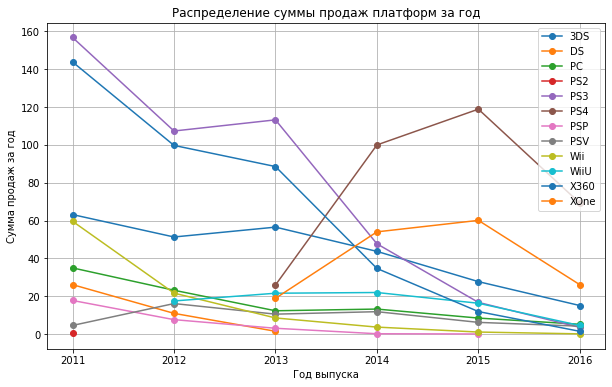

In [21]:
(
    data.query('year_of_release > 2010')
    .pivot_table(index='year_of_release', values='total_sales', columns='platform', aggfunc='sum')
    .plot(style='o-', title='Распределение суммы продаж платформ за год', 
        figsize=(10, 6), grid=True)
);
plt.xlabel('Год выпуска')    
plt.ylabel('Сумма продаж за год')
plt.legend()
plt.show();

Для построения прогноза на будущие годы необходимо использовать те данные, которые в дальнейшем еще будут актульны, так как ситуация на рынке очень изменчива. В связи с этим, нет необходимости рассматривать в качестве перспективных те платформы, которые к 2017 году уже станут неактуальными. 

За последние 5 лет множество игр уже исчерпали свой "жизненный цикл", однако, в 2013 году были выпущены 2 платформы, сумма продаж которых начала характерно расти в 2014. Соответсвенно, актуальным периодом становится тот период времени, когда сумма продаж по данным платформам начинает расти до текущего периода: с 2014 по 2016

Сформируем датасет за актуальный период и построим график.

In [22]:
data_for_2017 = data.query('year_of_release >= 2014')
data_for_2017

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [23]:
(
    data_for_2017
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False).head(10)
)


,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


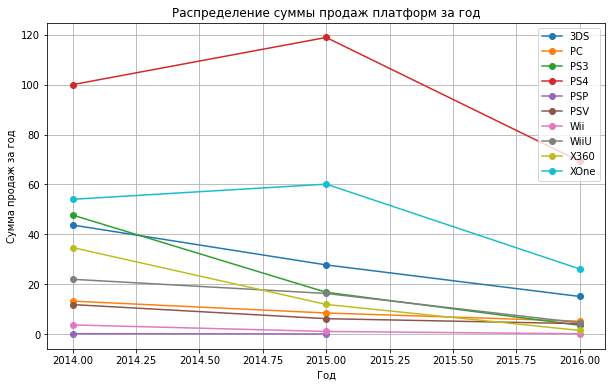

In [24]:
(
    data_for_2017
    .pivot_table(index='year_of_release', values='total_sales', columns='platform', aggfunc='sum')
    .plot(style='o-', title='Распределение суммы продаж платформ за год', figsize=(10, 6), grid=True)
);
plt.xlabel('Год')    
plt.ylabel('Сумма продаж за год')
plt.legend()
plt.show();

На основании полученных данных лидирующие позиции по продажам занимают платформы:
- PS4, сумма продаж которой за весь период составляет 288.15 млн. (по сравнению с 2014 годом продажи росли) 
- XOne, сумма продаж которой за весь период составляет 140.36 млн. (по сравнению с 2014 годом продажи росли) 
- 3DS, сумма продаж которой за весь период составляет 86.68 млн.
За актуальный период по большинству платформ сумма продаж постепенно начала снижаться, в том числе и по 3DS, являющейся одной из самых продаваемых. 

Изучая график, мы можем увидеть, что снижение продаж происходит равномерно по всем позициям. Возможно, это связано с увеличением доли рынка мобильных и онлайн-игр.

#### «Ящик с усами» и глобальные продажи игр в разбивке по платформам

В прошлом подпункте мы нашли платформы, "жизненный цикл" которых еще существует за период с 2014 по 2016гг. 
Рассмотрим продажу игр в разрезе выявленных платформ и построим диаграмму размаха (или по-другому "ящик с усами") с помощью функции boxplot().

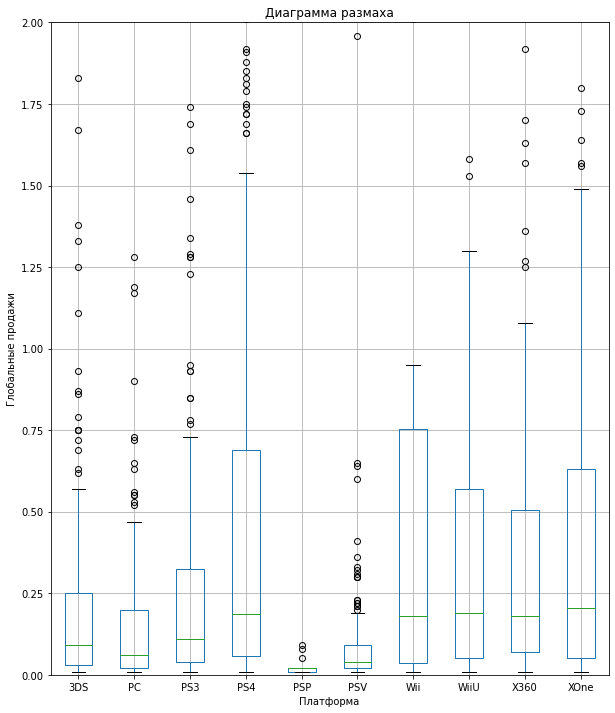

In [25]:
(
data_for_2017
    .pivot_table(index='name', values='total_sales', columns='platform')
    .boxplot(grid=True, figsize=(10,12))
    .set_ylim([0, 2])
)
plt.title('Диаграмма размаха')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи')
plt.show();

Так как выбросы данных мешают нам детальнее рассмотреть "основные" данные датасета, построим аналогичную диаграмму с большим масштабом, не учитывая выявленные выбросы.

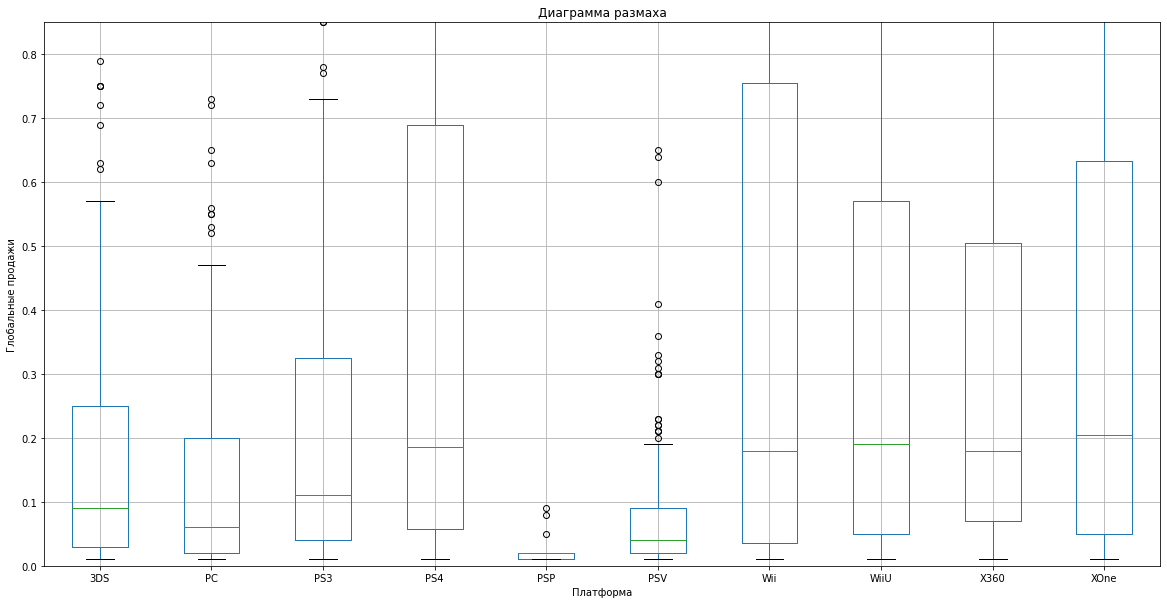

In [26]:
(
    data_for_2017
    .pivot_table(index='name', values='total_sales', columns='platform')
    .boxplot(grid=True, figsize=(20,10))
    .set_ylim([0, 0.85])
)
plt.title('Диаграмма размаха')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи')
plt.show();

График стал более наглядным, но для детального рассмотрения данных отразим общую информацию по сформированному датасету с помощью describe()

In [27]:
data_for_2017.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
PSP,13.0,0.027692,0.027735,0.01,0.0100,0.020,0.0200,0.09
PSV,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96
Wii,11.0,0.460909,0.625451,0.01,0.0350,0.180,0.7550,2.01
WiiU,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
X360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28


На основании полученной диаграммы и данных, выведенных с помощью функции describe() необходимо определить следующие выводы:
- Существуют платформы, по которым продажи одних платформ значительно превышают продажи других;
- Средние значения значительно превышают медианные значения, что в данных присутствует довольно большой разброс и существуют игры, "выстреливающие" на рынке,  из-за которых продажи так высоки;
- Лидирующими позициями по продаже игр являются платформы Wii, PS4, XOne. Платформа Wii выбилась вперед засчет отсутствия выборосов в значения, однако, все же платформы PS4, XOne в суммарном значении ее "перевешивают".

Таким образом, лидирующую позицию среди платформ по продаже игр занимает PS4.
- Отстающей позицией является платформа PSP. Это связано с тем, что при анализе актуального периода "жизненный цикл" PSP уже подходил к концу, в связи с чем, платформа уже перестает быть актуальной и продажи находятся на очень низкой позици.

#### Влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы .

Рассмотрим, как отзывы пользователй и критиков влияют на продажи игр для платформы PS4, которая является лидирующей среди других в актуальный период. Влияние данных факторов определим с помощью диаграммы рассеяния и коэффициента корреляции.

##### Зависимость пользовательских отзвывов на продажи по платформе PS4

In [28]:
data_for_2017.query('platform=="PS4"')[['total_sales', 'user_score']].corr()

,total_sales,user_score
total_sales,1.000000,-0.040132
user_score,-0.040132,1.000000


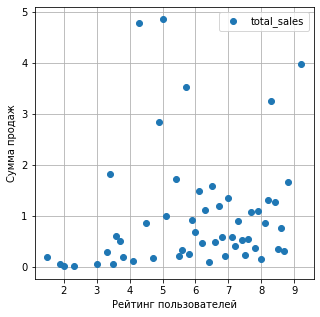

In [29]:
(
    data_for_2017
    .query('platform=="PS4"')[['total_sales', 'user_score']]
    .pivot_table(index='user_score', values='total_sales')
    .plot(style='o', figsize=(5, 5), grid=True)
)
plt.xlabel('Рейтинг пользователей')
plt.ylabel('Сумма продаж')
plt.show();

Исходя из диаграммы и полученных данных, мы видим, что зависимость между оценками пользователей и продажами отсутствует либо является непрямой, так как коэффициент корреляции является отрицательным. Логично было бы предположить, что чем большей пользовательский рейтинг у игры, тем продажи будут выше, но при этом, у всех пользователей разные факторы оценки игры, от которых зависит итоговый рейтинг: возможны случаи, когда рейтинг может быть высоким, при этом, продажи не соответствуют большим продажам.

##### Зависимость продаж от рейтинга критиков по платформе PS4

In [30]:
data_for_2017.query('platform=="PS4"')[['total_sales', 'critic_score']].corr()

,total_sales,critic_score
total_sales,1.000000,0.402661
critic_score,0.402661,1.000000


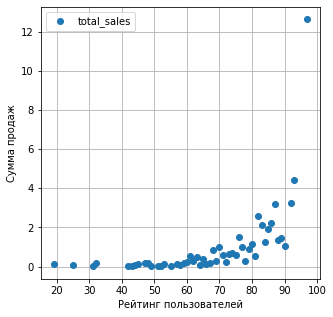

In [31]:
(
    data_for_2017
    .query('platform=="PS4"')[['total_sales', 'critic_score']]
    .pivot_table(index='critic_score', values='total_sales')
    .plot(style='o', figsize=(5, 5), grid=True)
)
plt.xlabel('Рейтинг пользователей')
plt.ylabel('Сумма продаж')
plt.show();

Зависимость между рейтингом критиков и продажами существует, но слабая: коэффициент корреляции составляет 0.4. Возможно, это связно с объективной оценкой профессионалов, на которую могут ориентироваться потребители, но даже данный фактор в меньшей степени отражает зависимость между рейтингом критиков и итоговыми продажами. 

Таким образом, оценки критиков демонстрируют прямую, но слабую корреляцию с итоговыми продажами. Оценки пользователей корреляции с продажами не имеют.

#### Зависимость отзывов пользователей и критиков и продаж всех платформ

Проанализируем корреляционную зависимость продаж остальных 4-х самых популярных платформ и оценок пользователей и критиков

In [32]:
(
    data_for_2017
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False).head()
)


,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22


Платформа "XOne"

In [33]:
data_for_2017.query('platform=="XOne"')[['total_sales', 'user_score']].corr()

,total_sales,user_score
total_sales,1.000000,-0.070384
user_score,-0.070384,1.000000


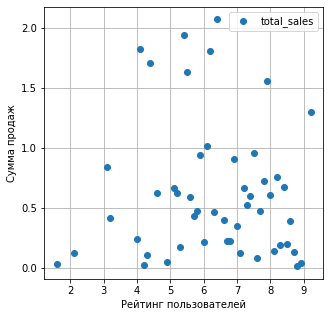

In [34]:
(
    data_for_2017
    .query('platform=="XOne"')[['total_sales', 'user_score']]
    .pivot_table(index='user_score', values='total_sales')
    .plot(style='o', figsize=(5, 5), grid=True)
)
plt.xlabel('Рейтинг пользователей')
plt.ylabel('Сумма продаж')
plt.show();

In [35]:
data_for_2017.query('platform=="XOne"')[['total_sales', 'critic_score']].corr()

,total_sales,critic_score
total_sales,1.000000,0.428677
critic_score,0.428677,1.000000


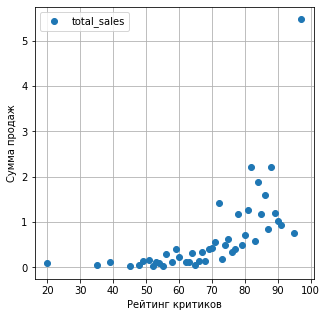

In [36]:
(
    data_for_2017
    .query('platform=="XOne"')[['total_sales', 'critic_score']]
    .pivot_table(index='critic_score', values='total_sales')
    .plot(style='o', figsize=(5, 5), grid=True)
)
plt.xlabel('Рейтинг критиков')
plt.ylabel('Сумма продаж')
plt.show();

Таким образом, корреляционная зависимость между продажами и оценками критиков и пользователей по платформе XOne:
- оценка пользователей: коэффициент корреляции составляет -0.07, что говорит об отсутствии зависимости оценок и продаж;
- оценка критиков: коэффициент корреляции составляет 0.42, что говорит существовании прямой зависимости между оценками и продажами, но, очевидно, слабой;

Платформа "3DS"

In [37]:
data_for_2017.query('platform=="PS3"')[['total_sales', 'user_score']].corr()

,total_sales,user_score
total_sales,1.000000,-0.166761
user_score,-0.166761,1.000000


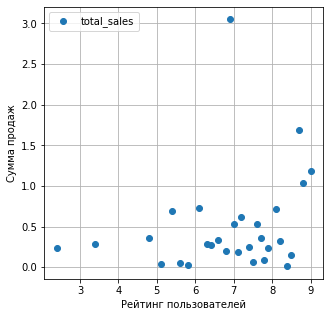

In [38]:
(
    data_for_2017
    .query('platform=="3DS"')[['total_sales', 'user_score']]
    .pivot_table(index='user_score', values='total_sales')
    .plot(style='o', figsize=(5, 5), grid=True)
)
plt.xlabel('Рейтинг пользователей')
plt.ylabel('Сумма продаж')
plt.show();

In [39]:
data_for_2017.query('platform=="3DS"')[['total_sales', 'critic_score']].corr()

,total_sales,critic_score
total_sales,1.000000,0.314117
critic_score,0.314117,1.000000


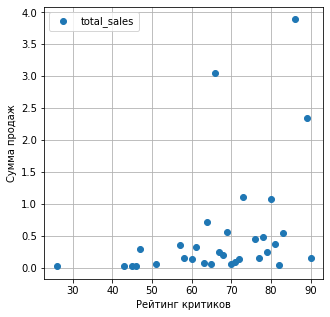

In [40]:
(
    data_for_2017
    .query('platform=="3DS"')[['total_sales', 'critic_score']]
    .pivot_table(index='critic_score', values='total_sales')
    .plot(style='o', figsize=(5, 5), grid=True)
)
plt.xlabel('Рейтинг критиков')
plt.ylabel('Сумма продаж')
plt.show();

Таким образом, корреляционная зависимость между продажами и оценками критиков и пользователей по платформе XOne:

- оценка пользователей: коэффициент корреляции составляет -0.16, то есть зависимость оценок и продаж отсутствует;
-оценка критиков: коэффициент корреляции составляет 0.3, что говорит о существовании прямой зависимости между оценками и продажами, но, достаточно слабой;

Платформа "PS3"

In [41]:
data_for_2017.query('platform=="PS3"')[['total_sales', 'user_score']].corr()

,total_sales,user_score
total_sales,1.000000,-0.166761
user_score,-0.166761,1.000000


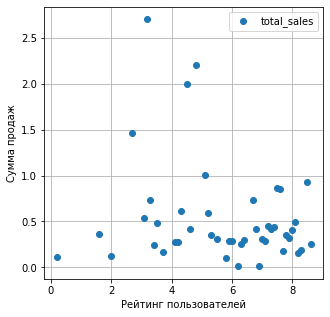

In [42]:
(
    data_for_2017
    .query('platform=="PS3"')[['total_sales', 'user_score']]
    .pivot_table(index='user_score', values='total_sales')
    .plot(style='o', figsize=(5, 5), grid=True)
)
plt.xlabel('Рейтинг пользователей')
plt.ylabel('Сумма продаж')
plt.show();

In [43]:
data_for_2017.query('platform=="PS3"')[['total_sales', 'critic_score']].corr()

,total_sales,critic_score
total_sales,1.000000,0.446575
critic_score,0.446575,1.000000


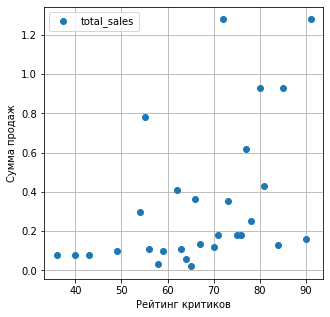

In [44]:
(
    data_for_2017
    .query('platform=="PS3"')[['total_sales', 'critic_score']]
    .pivot_table(index='critic_score', values='total_sales')
    .plot(style='o', figsize=(5, 5), grid=True)
)
plt.xlabel('Рейтинг критиков')
plt.ylabel('Сумма продаж')
plt.show();

Таким образом, корреляционная зависимость между продажами и оценками критиков и пользователей по платформе PS3":

- оценка пользователей: коэффициент корреляции составляет -0.16, то есть зависимость оценок и продаж отсутствует;
- оценка критиков: коэффициент корреляции составляет 0.3, что говорит о существовании прямой зависимости между оценками и продажами, но, достаточно слабой.

Платформа "X360"

In [45]:
data_for_2017.query('platform=="X360"')[['total_sales', 'user_score']].corr()

,total_sales,user_score
total_sales,1.000000,-0.138445
user_score,-0.138445,1.000000


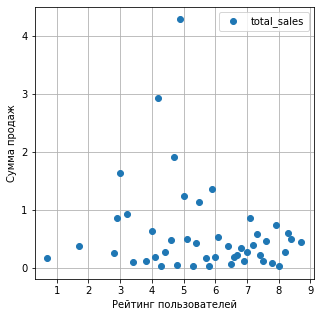

In [46]:
(
    data_for_2017
    .query('platform=="X360"')[['total_sales', 'user_score']]
    .pivot_table(index='user_score', values='total_sales')
    .plot(style='o', figsize=(5, 5), grid=True)
)
plt.xlabel('Рейтинг пользователей')
plt.ylabel('Сумма продаж')
plt.show();

In [47]:
data_for_2017.query('platform=="X360"')[['total_sales', 'critic_score']].corr()

,total_sales,critic_score
total_sales,1.000000,0.525723
critic_score,0.525723,1.000000


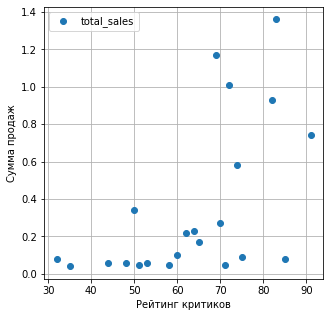

In [48]:
(
    data_for_2017
    .query('platform=="X360"')[['total_sales', 'critic_score']]
    .pivot_table(index='critic_score', values='total_sales')
    .plot(style='o', figsize=(5, 5), grid=True)
)
plt.xlabel('Рейтинг критиков')
plt.ylabel('Сумма продаж')
plt.show();

Таким образом, корреляционная зависимость между продажами и оценками критиков и пользователей по платформе X360:

- оценка пользователей: коэффициент корреляции составляет -0.13, то есть зависимость оценок и продаж отсутствует;
- оценка критиков: коэффициент корреляции составляет 0.52, что говорит о существовании прямой зависимости между оценками и продажами, но зависимость слабая.

Проведя исследование по остальным платформам, я пришла к выводу, что вне зависимости от платформы и ее продаж, корреляционная зависимость между продажами и пользовательскими оценками отсутствует. При этом, существует прям зависимость между продажами и оценкой критиков. Коэффициент корреляции данной зависимости в отношении исследуемых платформ варьируется от 0.3 до 0.5.

#### Анализ игр в зависимости от их жанра

In [49]:
games_by_genres = (
    data_for_2017
    .pivot_table(index='genre', values='total_sales', aggfunc='median')
    .sort_values(by='total_sales', ascending=False).head(10)
)
games_by_genres

,total_sales
genre,
Shooter,0.515
Sports,0.180
Platform,0.140
Fighting,0.125
Role-Playing,0.110
Simulation,0.100
Action,0.090
Misc,0.090
Racing,0.090


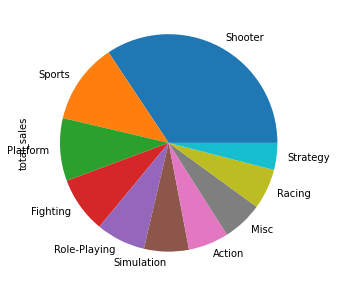

In [50]:
games_by_genres.plot(y='total_sales',kind='pie', figsize=(7,5), legend=False);

Самыми популярными жанрами являются: Shooter, Sports, Platform, Fighting и Role-Playing. Данные жанры заняли сильные позиции по сравнению с другими жанрами, что ярко показывает круговой график.

### Портрет пользователя каждого региона: Северная Америка (NA), Европейский союз (EU), Япония (JP)

#### Самые популярные платформы (top-5)

##### Портрет пользователя в Северной Америке (NA)

In [51]:
platforms_na = (
    data_for_2017
    .pivot_table(index='platform', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False).head()
)
platforms_na

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05


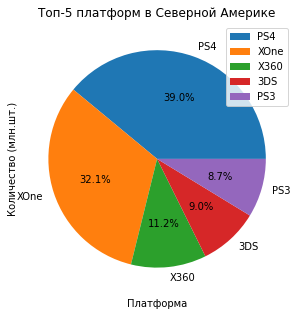

In [52]:
platforms_na.plot.pie(x = 'platform', y='na_sales', autopct='%1.1f%%', title='Топ-5 платформ в Северной Америке', figsize=(5, 5), grid=True)
plt.xlabel('Платформа')
plt.ylabel('Количество (млн.шт.)')
plt.show()

Анализируя суммарные продажи по платформам в Северной Америке отметим: самой продаваемой за период с 2014 по 2016гг. стала платформа "PS4", потеряла свою актуальность "PS3".

- Доля "PS4" от всего рынка составляет 39%
- Доля "PS3" от всего рынка составляет 8.7%

##### Портрет пользователя в Европейском Союзе(EU)

In [53]:
platforms_eu = (
    data_for_2017
    .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False).head()
)
platforms_eu

,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12


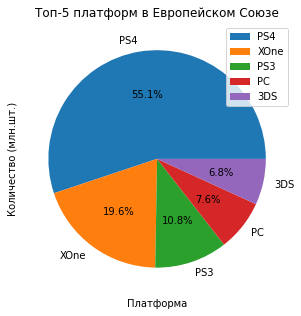

In [54]:
platforms_eu.plot.pie(y = 'eu_sales', autopct='%1.1f%%', title='Топ-5 платформ в Европейском Союзе', figsize=(5, 5))
plt.xlabel('Платформа')
plt.ylabel('Количество (млн.шт.)')
plt.show();

Данные и диаграмма по суммарным продажи по платформам в Европейском Союзе отражают: самой продаваемой за период с 2014 по 2016гг. стала платформа "PS4", потеряла свою актуальность "3DS".

Доля "PS4" от всего рынка составляет 55.1%

Доля "3DS" от всего рынка составляет 6.8%

4.1.3 Портрет пользователя в Японии(JP)

In [55]:
platforms_jp = (
    data_for_2017
    .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False).head()
)
platforms_jp

,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31


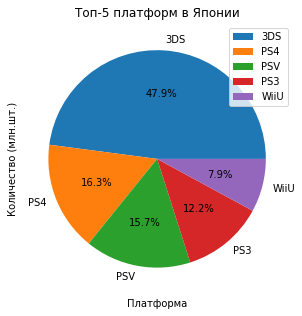

In [56]:
platforms_jp.plot.pie(y = 'jp_sales', autopct='%1.1f%%', title='Топ-5 платформ в Японии', figsize=(5, 5))
plt.xlabel('Платформа')
plt.ylabel('Количество (млн.шт.)')
plt.show();

Полученный анализ продаж платформ в Японии показал: самой продаваемой за период с 2014 по 2016гг. стала платформа "3DS", потеряла свою актуальность "WiiU".

Доля "PS4" от всего рынка составляет 47.9%

Доля "3DS" от всего рынка составляет 7.9%

Таким образом, среди всех регионов самой популярной платформой является PS4. Платформа 3DS менее популярна, чем в Японии.

Таким образом,

#### Самые популярные жанры (top-5)

##### Портрет пользователя в Северной Америке (NA)

In [57]:
genre_na = (
    data_for_2017
    .pivot_table(index='genre', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False).head()
)
genre_na

,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05


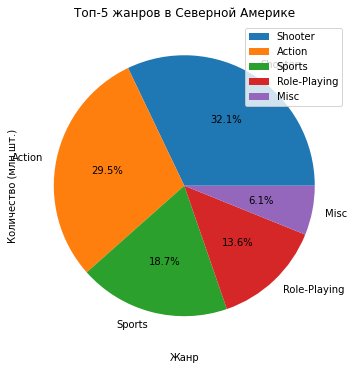

In [58]:
genre_na.plot.pie(y = 'na_sales', autopct='%1.1f%%', title='Топ-5 жанров в Северной Америке', figsize=(6, 6))
plt.xlabel('Жанр')
plt.ylabel('Количество (млн.шт.)')
plt.show();

Среди самых популярных жанров в Северной Америке являются: Shooter (доля составляет 32.1%) и Action(доля составляет 29,5%). Отстающим в данном рейтинге является Misc (доля составляет 6.1%)

##### Портрет пользователя в Северной Америке (NA)

In [59]:
genre_eu = (
    data_for_2017
    .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False).head()
)
genre_eu

,eu_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13


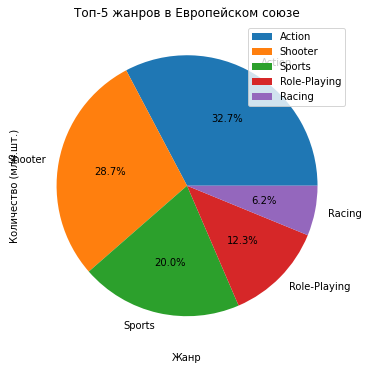

In [60]:
genre_eu.plot.pie(y = 'eu_sales', autopct='%1.1f%%', title='Топ-5 жанров в Европейском союзе', figsize=(6, 6))
plt.xlabel('Жанр')
plt.ylabel('Количество (млн.шт.)')
plt.show();

Лидирующую позицию среди жанров в Европейском Союзе занимает Action (доля составляет 32.7%), однако, жанр Shooter не намного отстает от него (доля составляет 28.7%). Наименьшую привлекательность для пользователь представляет жанр Racing (6.2%)

##### Портрет пользователя в Северной Америке (NA)

In [61]:
genre_jp = (
    data_for_2017
    .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False).head()
)
genre_jp

,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87


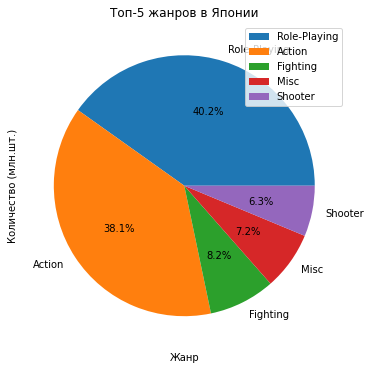

In [62]:
genre_jp.plot.pie(y = 'jp_sales', autopct='%1.1f%%', title='Топ-5 жанров в Японии', figsize=(6, 6))
plt.xlabel('Жанр')
plt.ylabel('Количество (млн.шт.)')
plt.show();

Самым популярным жанром в Японии является Role-Playing(доля рынка составляет 40.2%), самым непопулярным жанром является Shooter(доля рынка составляет 6.3%).


Таким образом, во всех регионах жанр Action занимает одну из лидирующих позиций, непопулярным является жанр Sport.

#### Влияние рейтинга ESRB на продажи в отдельном регионе

ESRB (англ. Entertainment Software Rating Board) - ассоциация, определяющая рейтинг компьютерных игр и присваивающая им подходящую возрастную категорию.

Чтобы изучить рейтинговые данные, учитывая пропущенные значения в столбце "rating". Заменим значения "Nan" на то число, которое точно не попадется в выборке: "-999". Теперь игры без рейтинга будут отражаться, как "-999".

In [63]:
data_for_2017['rating'] = data_for_2017['rating'].replace(np.NaN, '-999')

Обнаружили, что теперь все позиции без рейтинга отражаются в категории "-999"

In [64]:
data_for_2017['rating'].value_counts(dropna=False)

-999    749
T       271
M       265
E       219
E10+    185
Name: rating, dtype: int64

In [65]:
rating_sale = (
    data_for_2017
    .groupby('rating')['na_sales', 'eu_sales', 'jp_sales']
    .sum()
    .sort_values(by='na_sales', ascending=False).reset_index()
)
rating_sale

,rating,na_sales,eu_sales,jp_sales
0,M,96.42,93.44,8.01
1,-999,64.72,58.95,56.90
2,E,50.74,58.06,8.94
3,T,38.95,34.07,14.78
4,E10+,33.23,26.16,4.46


- Категория М (Для взрослых): самая популярная в Северной Америке и Европейском Союзе;

- Категория "Игры без рейтинга": занимает лидирующую позицию в Японии и занимает вторую позицию в Северной Америке и Европейском Союзе;

- Категория Е (Для всех): является менее популярной и занимает третью позицию после категории М в Северной Америке и Европейском Союзе;

- Категория Т (Для подростков): занимает третью позицию после категории М в Северной Америке и Европейском Союзе, однако, явлется одной из самых популярных в Японии и занимает вторую позицию среди прочих;

- Категория Е10+ (Для всех старше 10 лет): последняя в списке категория во всех регионах.

### Анализ гипотез

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые:

Для анализа гипотез необходить сформулировать нулевую гипотезу H0 и альтернативную гипотезу H1:

H0 - средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

H1 - средние пользовательские рейтинги платформ Xbox One и PC имеют различный характер.

Для сравнения средних пользовательских рейтингов воспользуемся соответствующими массивами данных и применим к ним метод scipy.stats.ttest_ind (array1, array2, equal_var)

Параметр equal_var необходимо отразить, как "False", в связи с тем, что дисперсии у генеральных совокупностей могут различаться.

Критический уровень статистической значимости (alpha) определим, как 5%, так как данный процент является стандартным для любой выборки данных.



Сформируем данныe по платформам Xbox One и PC за актуальны период и удалим пропуски, чтобы отобразить корректную выборку:

In [66]:
xbox_one = data_for_2017.query('platform == "XOne"')['user_score'].dropna()
xbox_one.head()

165    7.9
179    5.4
242    6.4
270    6.2
373    4.1
Name: user_score, dtype: float64

In [67]:
pc = data_for_2017.query('platform == "PC"')['user_score'].dropna()
pc.head()

458     3.9
1530    5.4
1730    7.9
2303    5.7
2784    5.9
Name: user_score, dtype: float64

In [68]:
alpha = 0.05

results = st.ttest_ind(
    xbox_one, 
    pc,
    equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Таким образом, отсутствуют основания считать, что средние пользовательские рейтинги платформ Xbox One и PC значимо различаются»

#### Средние пользовательские рейтинги жанров Action и Sports разные:

По аналогии с пунктом 5.4 проведем анализ с помощью метода scipy.stats.ttest_ind (array1, array2, equal_var). 

Параметры для теста оставим такие же. Опеределим следующие гипотезы:


H0 - Средние пользовательские рейтинги жанров Action и Sports одинаковые;

H1 - Средние пользовательские рейтинги жанров Action и Sports разные.




Сформируем данныe по жанрам Action и Sports за актуальны период и удалим пропуски, чтобы отобразить корректную выборку:

In [69]:
action = data_for_2017.query('genre == "Action"')['user_score'].dropna()
action.head()

42     8.3
165    7.9
231    8.1
295    6.3
304    4.9
Name: user_score, dtype: float64

In [70]:
sports = data_for_2017.query('genre == "Sports"')['user_score'].dropna()
sports.head()

77     4.3
94     5.0
143    5.7
264    4.5
314    6.7
Name: user_score, dtype: float64

In [71]:
alpha = 0.05

results = st.ttest_ind(
    action, 
    sports,
    equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


Таким образом, средние пользовательские рейтинги жанров Action и Sports имееют статистически значимые различия.

Обобщая данный раздел отметим:
- Средние пользовательские рейтинги платформ Xbox One и PC значимо не различаются;
- У средних пользовательских рейтингов жанров Action и Sports статистические значимости различны.

### Вывод

В рамках проведения анализа данных были пройдены следующие этапы:

- Проведен обзорный анализ данных

- Осуществлена предобработка данных;

- Проведен исследовательский анализ данных с помощью изучения датасета и построения различных графиков;

- Проанализиран портрет пользователей среди населения Северной Америки, Европейского Союза и Японии;

- Проведен анализ гипотез.

Обзорный анализ данных показал наличие некорректных значений в датасете, пропущенных значений и некорректный тип данных у некоторых столбцов, которые в дальнейшему были изменены на соответствующий.

Некорректные значения, например "tbd" были заменены более подходящими - Nan. Но в рамках замены мы определели, что tbd - "to be determined" означает "будет определено". То есть, данные показатели еще не сформировались.

Далее, проведенный исследовательский анализ данных показал, что с 1980 по 2008 год количество выпущенных игр в год постепенно росло. Пиковой точкой выпуска игр являкется 2008 год, в котором было выпущено 1 427 штук. Однако, с 2008 и далее спрос на игры снижался, вероятно, из-за появления мобильных и онлайн-игр.

За исследуемый период самыми популярными платформами: PS2, X360, PS3, WII, DS, PS, а в среднем срок "жизненного цикла" платформ, которые используются для игр, составляет 10 лет. 

Взяв за актуальный период для прогноза 2013-2016гг, необходимо сделать вывод, что лидирующие позиции по продажам за исследуемый перид занимают платформы: PS4, XOne, 3DS. Самую низкую позицию занимает PSP. По большинству платформ сумма продаж постепенно снижается, но при этом, снижение происходит равномерно по всем платформам. Вероятно, спрос на платформы в целом из года в год будет падать.

Также, мною была выявлена насколько взаимосвязаны оценки пользователей и критиков с продажами игр. Оценка критиков имеет прямую зависимость, когда в то же время между оценками пользователей и продажами зависимость отсутствует. 

По итогам проведенного исследования самыми популярными жанрами являются: Shooter, Sports, Platform. Данные жанры заняли сильные позиции по сравнению с другими.

Анализ портрета пользователей показал, что среди Среди всех регионов самой популярной платформой является PS4. Платформа 3DS менее популярна, чем в Японии. Также, необходимо отметить, что среди рейтинга компьютерных игр по возрастному показателю лидирует:
- категория "для взрослых" в Северной Америке и Европейском Союзе;
- категория "Игры без рейтинга": занимает лидирующую позицию в Японии;
- категория "Для всех": является менее популярной и занимает третью позицию после категории М в Северной Америке и Европейском Союзе;
- категория "Для подростков": занимает третью позицию после категории М в Северной Америке и Европейском Союзе, однако, явлется одной из самых популярных в Японии и занимает вторую позицию среди прочих;
- категория "Для всех старше 10 лет": самая непопулярная категория среди всех регионов.
5) Проведен анализ гипотез, из которого следует вывод, что средние пользовательские рейтинги платформ Xbox One и PC значимо не различаются. Также, с средних пользовательских рейтингов жанров Action и Sports статистические значимости различны.

Рекомендации:

- При выборе плафтормы для игры необходимо рассматривать самый актуальный на текущий момент вариант "PS4" - Sony Playstation 4.
- В зависимости от региона, в котором развивается бизнес, учесть рекомендации про категориям игр, указанных выше.
- Учитывать популярность жанров, выявленных в исследовании : Shooter, Sports, Platform.


